## Exploratory Data Analytics / Root Cause Analysis
1. Domain Exploration
    - Understanding the business process, understand the data sources
    - Understand common beliefs within the business
    
2. Data collection and Data exploration
    - Colllect data from multiple sources
    - form a dataset, perform generic exploration to understand data quality
    
3. Data cleaning
    - Handle duplicate entries
    - Handle unwanted cols
    - Handling missing values
    - Handling outliers

4. Exploratory Data Analytics
    - Data VIsualization**
        - Univariate analysis
        - Bivariate analysis
        - Multivarite analysis

    - Statistical Research**
        - Correlation Analysis
        - ANOVA
        - Chi Square
    
5. Preparing the report

## 2. Data collection and Data exploration

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

In [3]:
df = pd.read_csv("resources/datasets-1/Bank_churn_modelling.csv")
df.shape

(10000, 14)

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9985 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  9990 non-null   float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
print(df.Geography.unique())
print(df.Gender.unique())

['France' 'Spain' 'Germany']
['Female' 'Male']


In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9985.000000,10000.000000,10000.000000,10000.00000,10000.000000,9990.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.013721,76485.889288,1.530200,0.70550,0.515100,100127.441333,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892213,62397.405202,0.581654,0.45584,0.499797,57497.228065,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51112.885000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100238.110000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149400.922500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


**Observations**
   - RowNumber, CustomerId, Surname are unwanted columns
   - Bank is operational from last 10 years
   - 25% of the customers have 0 balance in their account
   - almost half of the customesr in the bank are not active members

## 3. Data cleaning

In [7]:
# Check for duplicates
df.duplicated().sum()

0

In [8]:
# drop unwanted columns - rownumber, customerid, surname
df.drop(columns=['RowNumber','CustomerId', 'Surname'], inplace=True)

In [9]:
# Check for missing values
df.isnull().sum()

CreditScore         0
Geography           0
Gender              0
Age                 0
Tenure             15
Balance             0
NumOfProducts       0
HasCrCard           0
IsActiveMember      0
EstimatedSalary    10
Exited              0
dtype: int64

In [10]:
df.skew()

CreditScore       -0.071607
Age                1.011320
Tenure             0.010333
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.001322
Exited             1.471611
dtype: float64

In [11]:
df.fillna(df.mean(), inplace=True)
# Check for missing values
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [12]:
# Check for outliers
df.skew()

CreditScore       -0.071607
Age                1.011320
Tenure             0.010341
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.001323
Exited             1.471611
dtype: float64

## 3. Exploratory Data Analysis
### Univariate Analysis
    - analysing one variable at a time
    - Numeric - continuous frequency distribution - histogram
    - Categorical - discrete frequency distribution - barplot

In [13]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [14]:
nums = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
cats = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember','Exited']

In [ ]:
for col in nums:
    fig = px.histogram(df, x=col, width=1000, height=350)
    fig.show()

In [ ]:
for col in cats:
    fig = px.histogram(df, x=col, width=1000, height=350)
    #fig.update_traces(marker_color='red')
    fig.show()

### ***Observation***
    - Age has slight outliers present
    - approx 36% of customers have 0 balance, rest customer have balance approx higher than 100K
    - approx 95% of customers have either 1 or 2 products
    - salary and tenure has almost uniform distribution
    - approx 50% of customers are from France, rest of Germany and Spain
    - approx 70% of customers have credit card
    - almost 48% of customers are not actively using bank accounts
    - approx 20% of customers left the bank

In [15]:
nums = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
cats = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember','Exited']

### Numeric vs Categorical

In [17]:
import plotly.figure_factory as ff

In [ ]:
for col in nums:
    data = [df[col][df.Exited==0],df[col][df.Exited==1]]
    fig = ff.create_distplot(data,['Exited = 0','Exited = 1'])
    fig.update_layout(title_text = "graph for " + col)
    fig.show()

## Categorical vs Categorical

In [ ]:
for col in cats:
    print(col)
    pivot = pd.crosstab(df[col], df.Exited, margins=True)
    print(pivot, '\n')
    print(pivot[1]/pivot['All'],'\n','\n')

## **Observations**
    - Significantly impacting factors are - age, NumberOfProducts, Geography, Gender, IsActiveMember

## Multivariate Analysis
    - numeric vs numeric vs categorical - scatterplot
   

In [19]:
fig = px.scatter(df, x="Age", y="CreditScore", color="Exited")
fig.show()

In [20]:
# categorical vs numeric vs categorical
# Geography vs age vs Exited
fig = px.strip(df, x='Geography', y='Age', color='Exited')
fig.show()

In [21]:
fig = px.parallel_coordinates(df[['Age','Balance','NumOfProducts','Exited']].sample(1000, axis=0), color='Exited')
fig.show()

## Statistical Research

## Correlation Analysis

In [21]:
import seaborn as sns

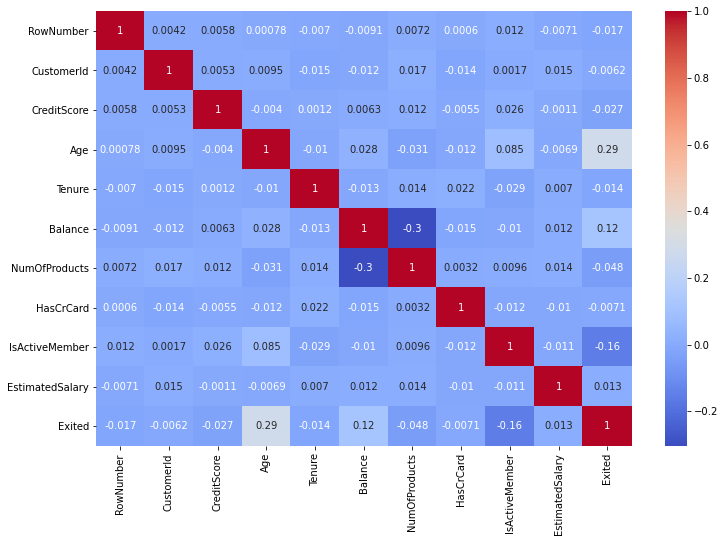

In [30]:
cor = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(cor, annot=True, cmap='coolwarm')
plt.show()